### Student Information
Name: 洪偉豪

Student ID: 108062324

GitHub ID: MilkShakeBro

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# First: Take Home Exercise

## Exercise 2

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

##########################
# Exercise 2 (take home) #
##########################

#Swap column
# X.loc[:, ["text", "category_name"]] = X[["category_name", "text"]].to_numpy()
# X[:10][['text', 'category_name']] # check if the column has been swapped

#Attribute access
x = X.copy()
# x.text # check if it can really access the text column

#Assign a dict to the data frame
# X.iloc[0] = {'text': 'hi', 'category': 4, 'category_name': 'milkshakebro'}
# X[:10][['text', 'category']] # check if the value is assigned

#Slicing range
x = X.copy()
# x[:5]   # top 5
# x[::2]  # interval = 2
# x[::-1] # start from the end

#Getting value from the column
# X.loc[:, 'category'] == 3 # select the category which value is 3 and return a boolean array

## Exercise 5

In [2]:
# Usage of .isnull()
# Detect missing values for an array-like object.
# This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

# Explanation
# 0 -> numeric arrays -> True  (By .isnull() usage)
# 1 -> Empty          -> True  (By .isnull() usage)
# 2 -> String         -> False (This is a string type)
# 3 -> String         -> False (This is a string type)
# 4 -> None           -> True  (By .isnull() usage)
# 5 -> String         -> False (Empty String in python is still a string type not the NaN or None type)

## Exercise 6

In [3]:
# Answer here
X.category_name.value_counts()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

## Exercise 8

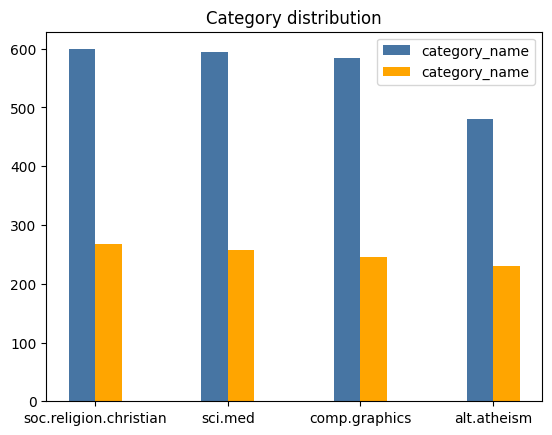

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# Answer here
N = 4

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, X.category_name.value_counts(), width, color=(0.2, 0.4, 0.6, 0.9))
rects2 = ax.bar(ind + width, X_sample.category_name.value_counts(), width, color='orange')

# add some text for labels, title and axes ticks
ax.set_title('Category distribution')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'))

ax.legend((rects1[0], rects2[0]), ('category_name', 'category_name'))

plt.show()

## Exercise 10

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# Answer here
ans = []
for key, value in enumerate(X_counts[4].toarray()[0][0:100]):
    if value == 1: print(count_vect.get_feature_names_out()[key])

00
01


## Exercise 11

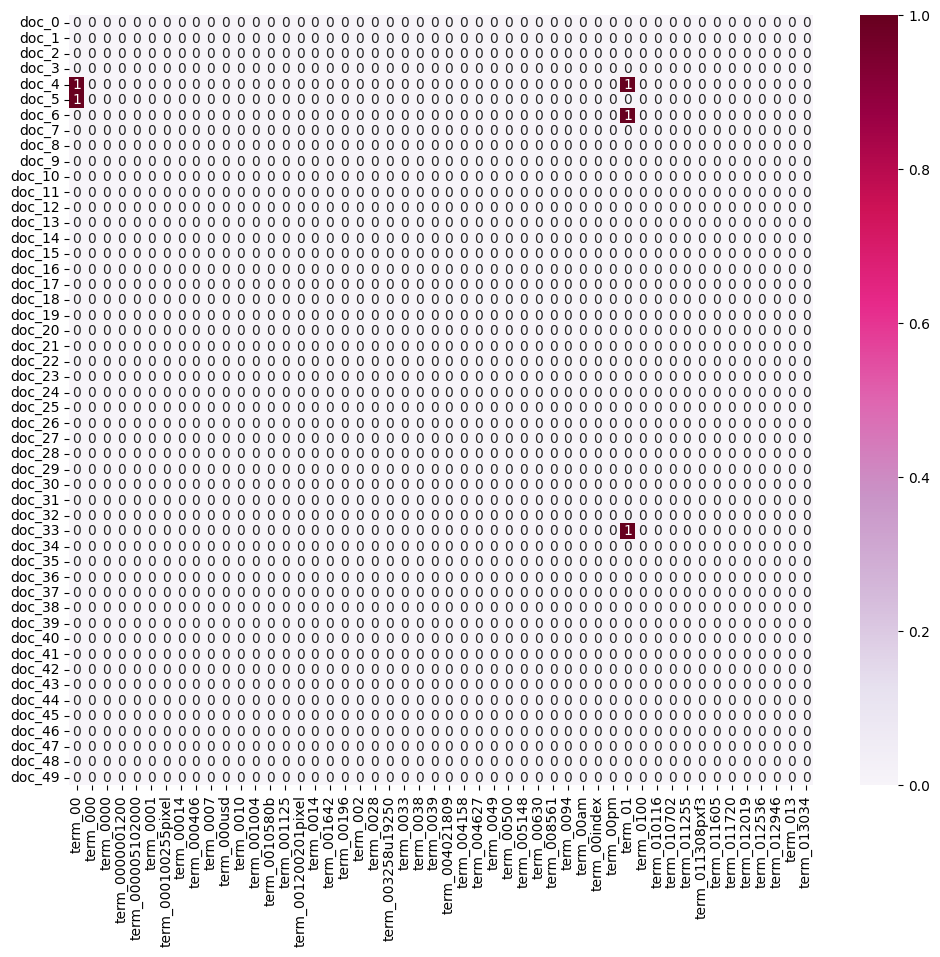

In [6]:
import seaborn as sns
# Answer here

# If you want to get certain feature names, you can modify the array range in plot_x
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

# If you want to get certain document samples, you can modify the array range in plot_y
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]

# The range in plot_z is the combination of the plot_x and plot_y ([plot_y, plot_x])
plot_z = X_counts[0:50, 0:50].toarray()

ans = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(ans,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Exercise 12

['red', 'blue', 'green', 'orange']
['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


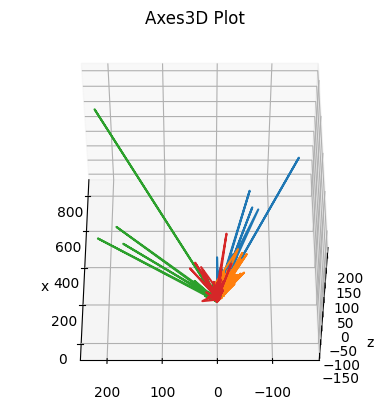

In [7]:
# Answer here

from sklearn.decomposition import PCA

col = ['red', 'blue', 'green', 'orange']
print(col)
print(categories)

ans_12 = PCA(n_components = 3).fit_transform(X_counts.toarray())

ax_ans = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = ans_12[X['category_name'] == category].T[0]
    ys = ans_12[X['category_name'] == category].T[1]
    zs = ans_12[X['category_name'] == category].T[2]
    ax_ans.plot(xs, ys, zs)

ax_ans.set_xlabel('x')
ax_ans.set_ylabel('y')
ax_ans.set_zlabel('z')
# ax_ans.view_init(elev=0, azim=0)
# ax_ans.view_init(elev=25, azim=0)
# ax_ans.view_init(elev=50, azim=0)
# ax_ans.view_init(elev=10., azim=90)
ax_ans.view_init(elev=50., azim=180)
# ax_ans.view_init(elev=10., azim=270)
plt.title('Axes3D Plot')
plt.show()

(elev=25, azim=0), (elev=50, azim=0), (elev=50, azim=180): 
-> We can see that blue and green lines have a hint of separation, while orange and blue lines have the same tendency.
This could represent that the most of the charateristic of 'soc.religion.christian' and 'com.graphics' may be different, while most of the charateristic of 'sci.med' and 'soc.religion.christian' may be close to each other.

## Exercise 13

In [8]:
# Answer here

import plotly.express as px

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
ans_13 = px.bar(x=count_vect.get_feature_names_out()[:50], y=term_frequencies[:50])
ans_13.show()

## Exercise 14

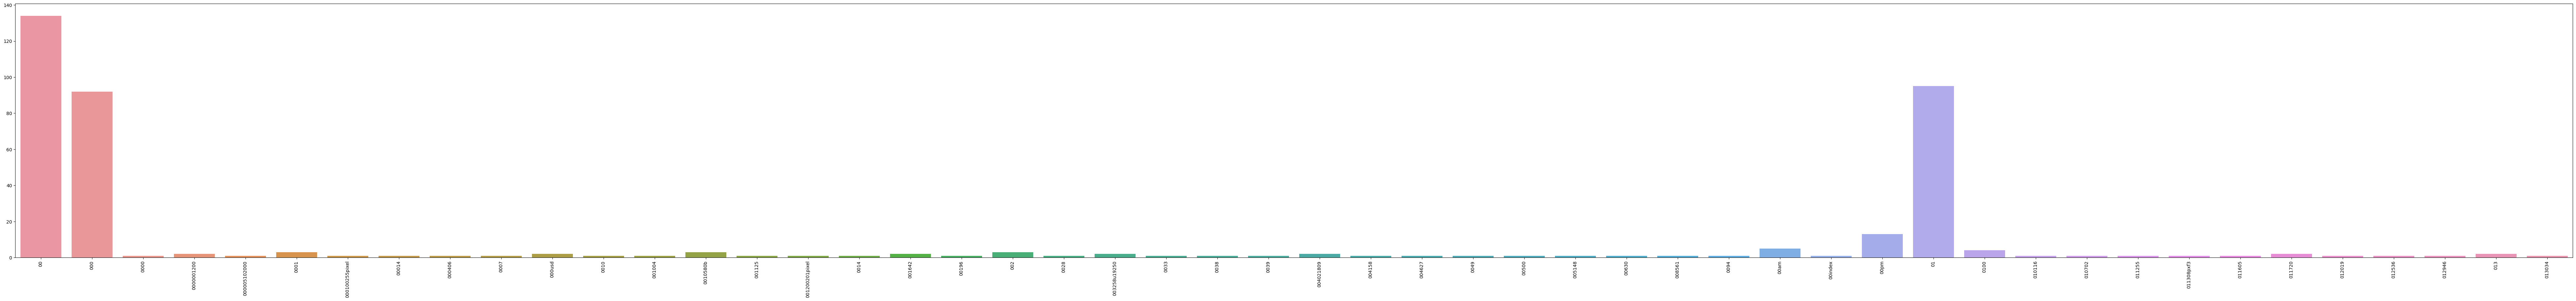

In [9]:
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names_out()[:50], rotation = 90)
plt.show()

## Exercise 15

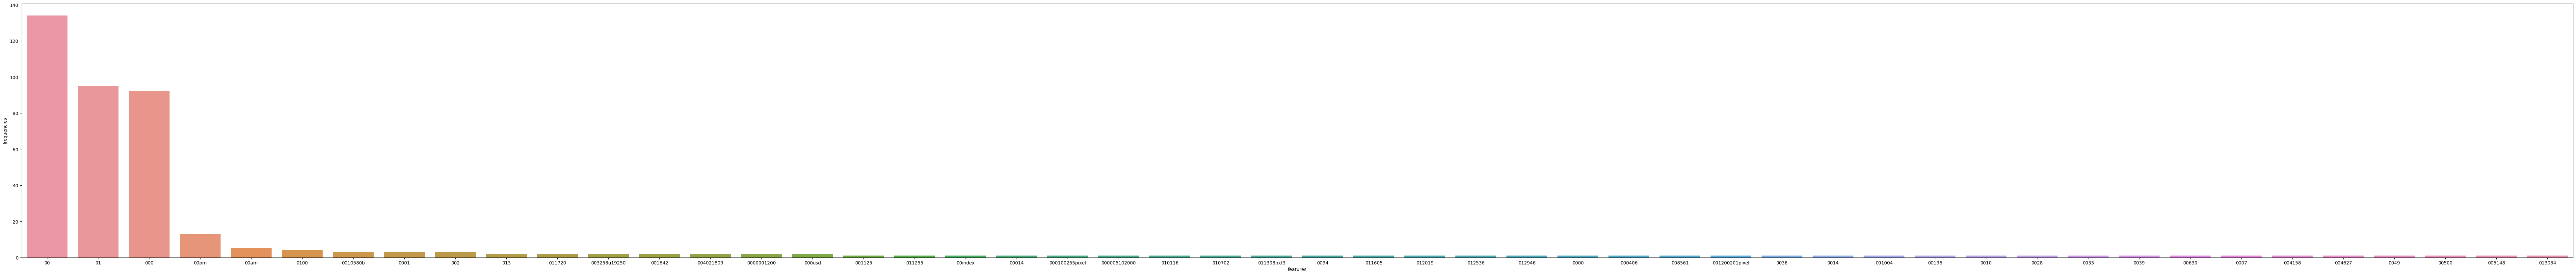

In [10]:
# Answer here
df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:50], "frequencies": term_frequencies[:50]})
plt.subplots(figsize=(100, 10))
g = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

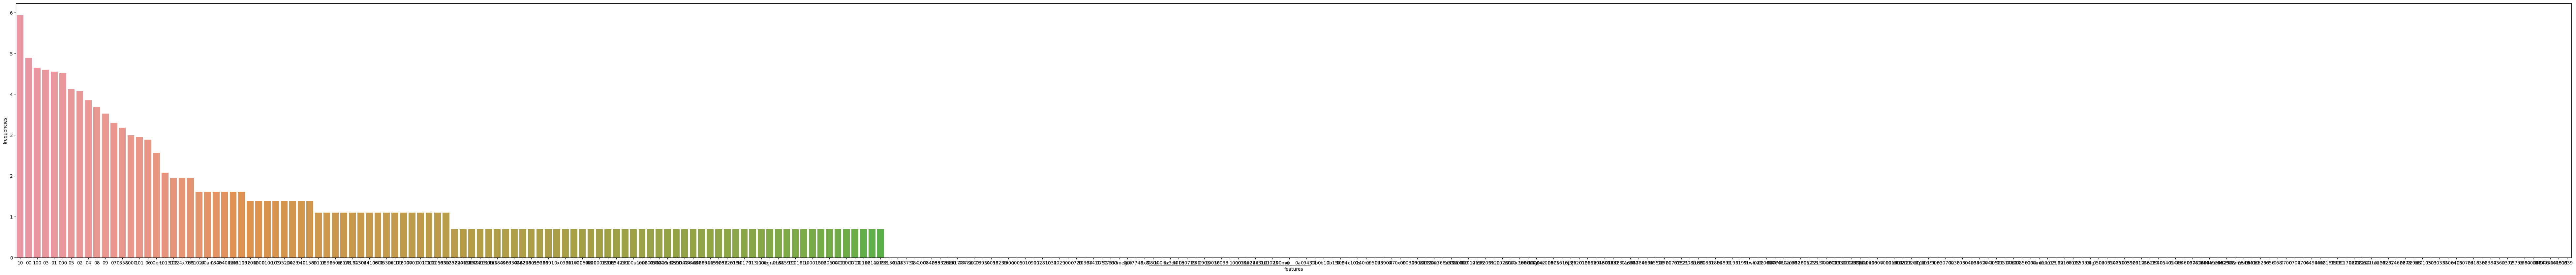

In [11]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:300], "frequencies": term_frequencies_log[:300]})

plt.subplots(figsize=(100, 10))
sorted = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

## Exercise 16

In [12]:
# Answer here -- Yes, it works!

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Second: New Data Set

## Load files

In [13]:
from sklearn.datasets import load_files

dataset = load_files("./sentiment-labelled-sentences")

# dataset.data[0] # amazon
# dataset.data[1] # imdb
# dataset.data[2] # yelp

# dataset.data[0:2]
# dataset.target_names

# print("\n".join(dataset.data[0].decode("utf-8") .split("\n")))

## Dataframe

In [14]:
def format_text(data):
    """ format the text field and strip special characters """
    D = []
    for d in data:
        if len(d.split("\t")) == 0: break
        D.append([d.split("\t")[0]])
    return D

def format_label(data):
    """ format the text field and strip special characters """
    D = []
    for d in data:
        if len(d.split("\t")) == 0: break
        D.append(d.split("\t")[1])
    return D

In [15]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# Integrate all attributes from three datasets into a dataframe
X = pd.DataFrame()
for i in range(len(dataset.target_names)):
    df = pd.DataFrame.from_records(format_text(dataset.data[i].decode("utf-8").split("\n")), columns= ['text'])
    df['sentiment'] = format_label(dataset.data[i].decode("utf-8").split("\n"))
    df['category'] = dataset.target_names[i]
    X = pd.concat([X, df], ignore_index=True)

X

,text,sentiment,category
0,Wow... Loved this place.,1,amazon
1,Crust is not good.,0,amazon
2,Not tasty and the texture was just nasty.,0,amazon
3,Stopped by during the late May bank holiday of...,1,amazon
4,The selection on the menu was great and so wer...,1,amazon
...,...,...,...
2995,The screen does get smudged easily because it ...,0,yelp
2996,What a piece of junk.. I lose more calls on th...,0,yelp
2997,Item Does Not Match Picture.,0,yelp
2998,The only thing that disappoint me is the infra...,0,yelp


In [16]:
# Simple queries
X[0:10]
X[:10][["text","sentiment"]]
X[-10:]

# Using loc (by label)
X.loc[:10, 'text']

# Using iloc (by position)
X.iloc[:10, 0]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: text, dtype: object

## Missing Values

In [17]:
# Check missing values
X.isnull().apply(lambda x: dmh.check_missing_values(x))

# Create a dummy record missing 'sentiment' attribute
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series.to_frame().T

# Add the record to the dataframe
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

# Check if the records was commited into result
len(result_with_series)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0


In [18]:
# Create a dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'sentiment': 1
              }]

# Add the record to the dataframe             
result_with_series = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

# Check if the records was commited into result
len(result_with_series)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [19]:
# Drop the record with missing value
result_with_series.dropna(inplace=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


## Duplicate Data

In [20]:
# Check duplicated data
print("Sum of the duplicated data:", sum(X.duplicated()))

# Create dummy duplicated data
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'sentiment': 0
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'sentiment': 0
                        }]

# Add the duplicated data to the dataframe
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

# Drop the duplicated data
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

X

Sum of the duplicated data: 17


,text,sentiment,category
0,Wow... Loved this place.,1,amazon
1,Crust is not good.,0,amazon
2,Not tasty and the texture was just nasty.,0,amazon
3,Stopped by during the late May bank holiday of...,1,amazon
4,The selection on the menu was great and so wer...,1,amazon
...,...,...,...
2995,The screen does get smudged easily because it ...,0,yelp
2996,What a piece of junk.. I lose more calls on th...,0,yelp
2997,Item Does Not Match Picture.,0,yelp
2998,The only thing that disappoint me is the infra...,0,yelp


## Data Preprocessing

### Sampling

In [21]:
X_sample = X.sample(n=1000) #random state
print(len(X_sample))
X[320:350]

1000


,text,sentiment,category
320,The only downside is the service.,0,amazon
321,"Also, the fries are without a doubt the worst ...",0,amazon
322,Service was exceptional and food was a good as...,1,amazon
323,"A couple of months later, I returned and had a...",1,amazon
324,Favorite place in town for shawarrrrrrma!!!!!!,1,amazon
325,The black eyed peas and sweet potatoes... UNREAL!,1,amazon
326,You won't be disappointed.,1,amazon
327,They could serve it with just the vinaigrette ...,1,amazon
328,I go to far too many places and I've never see...,0,amazon
329,When my mom and I got home she immediately got...,0,amazon


imdb      994
amazon    992
yelp      980
Name: category, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

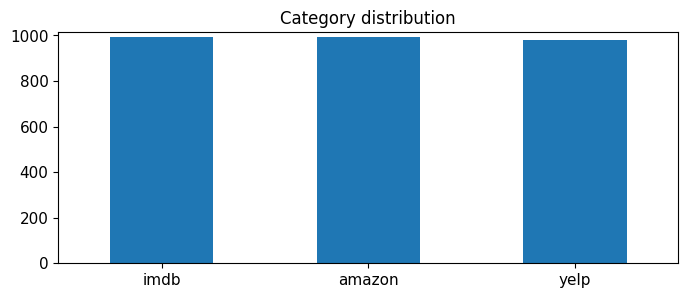

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X.category.value_counts())

# plot barchart for X
X.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(X.category.value_counts())+20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      338
yelp      332
amazon    330
Name: category, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

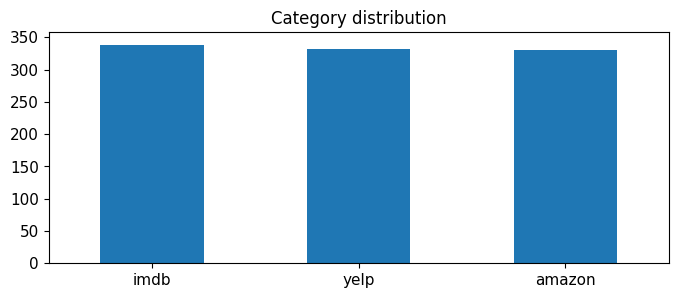

In [23]:
print(X_sample.category.value_counts())

# plot barchart for X_sample
X_sample.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(X_sample.category.value_counts())+20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

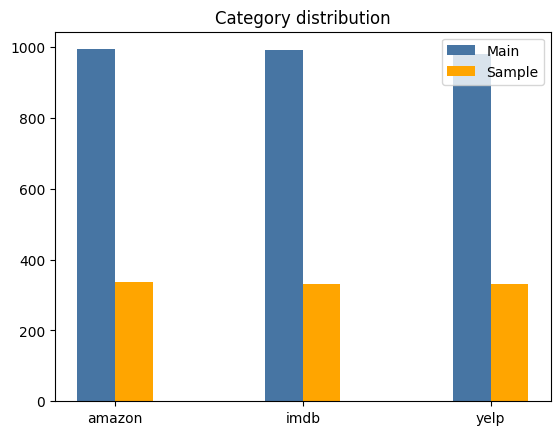

In [24]:
# Answer here
N = 3

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, X.category.value_counts(), width, color=(0.2, 0.4, 0.6, 0.9))
rects2 = ax.bar(ind + width, X_sample.category.value_counts(), width, color='orange')

# add some text for labels, title and axes ticks
ax.set_title('Category distribution')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('amazon', 'imdb', 'yelp'))

ax.legend((rects1[0], rects2[0]), ('Main', 'Sample'))

plt.show()

### Feature Creation

In [25]:
import nltk

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

# Print out the unigrams
X[0:4]["unigrams"]

# Print out the dataframe
X[0:4]

,text,sentiment,category,unigrams
0,Wow... Loved this place.,1,amazon,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,amazon,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,amazon,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,amazon,"[Stopped, by, during, the, late, May, bank, ho..."


### Feature subset selection

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

# Analyze text
analyze = count_vect.build_analyzer()
analyze(X.text[1])

# Check the shape of this matrix by:
X_counts.shape

# Obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names_out()[0:10]

# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

  (0, 5110)	1
  (0, 2710)	1
  (0, 4556)	1
  (0, 3349)	1


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

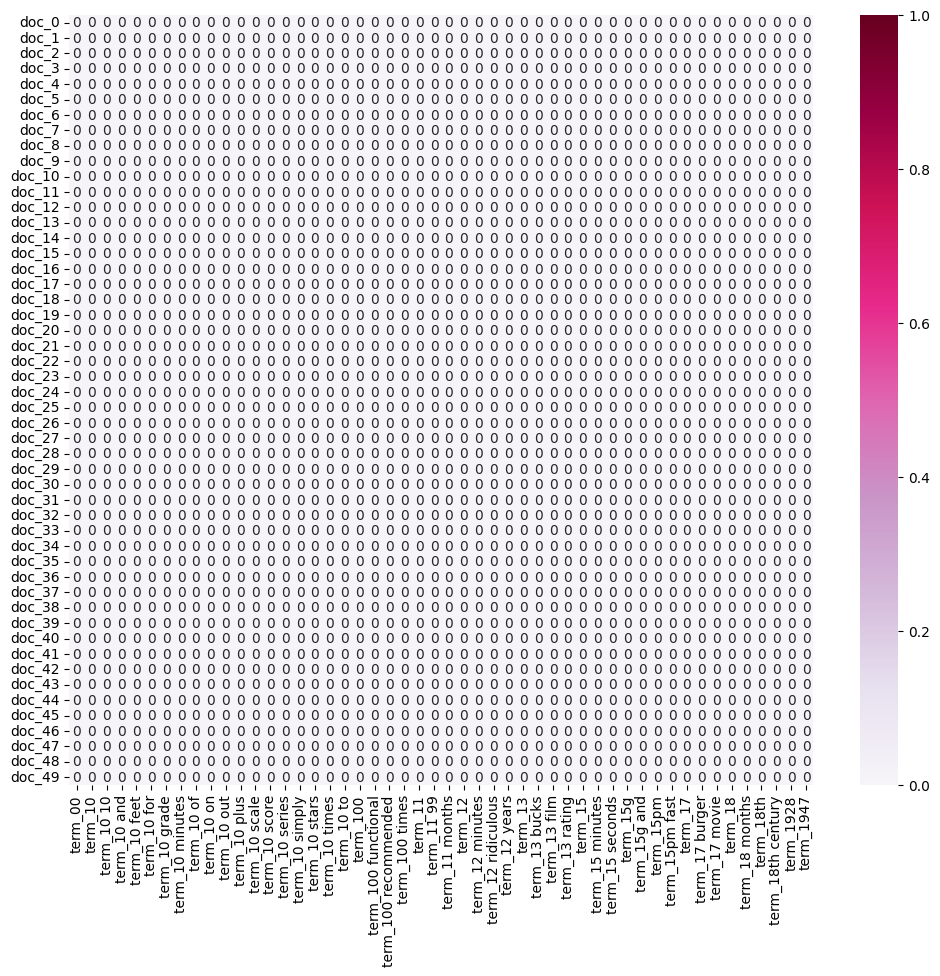

In [27]:
import seaborn as sns

# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:50]]

# Obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]

plot_z = X_counts[0:50, 0:50].toarray()
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality Reduction

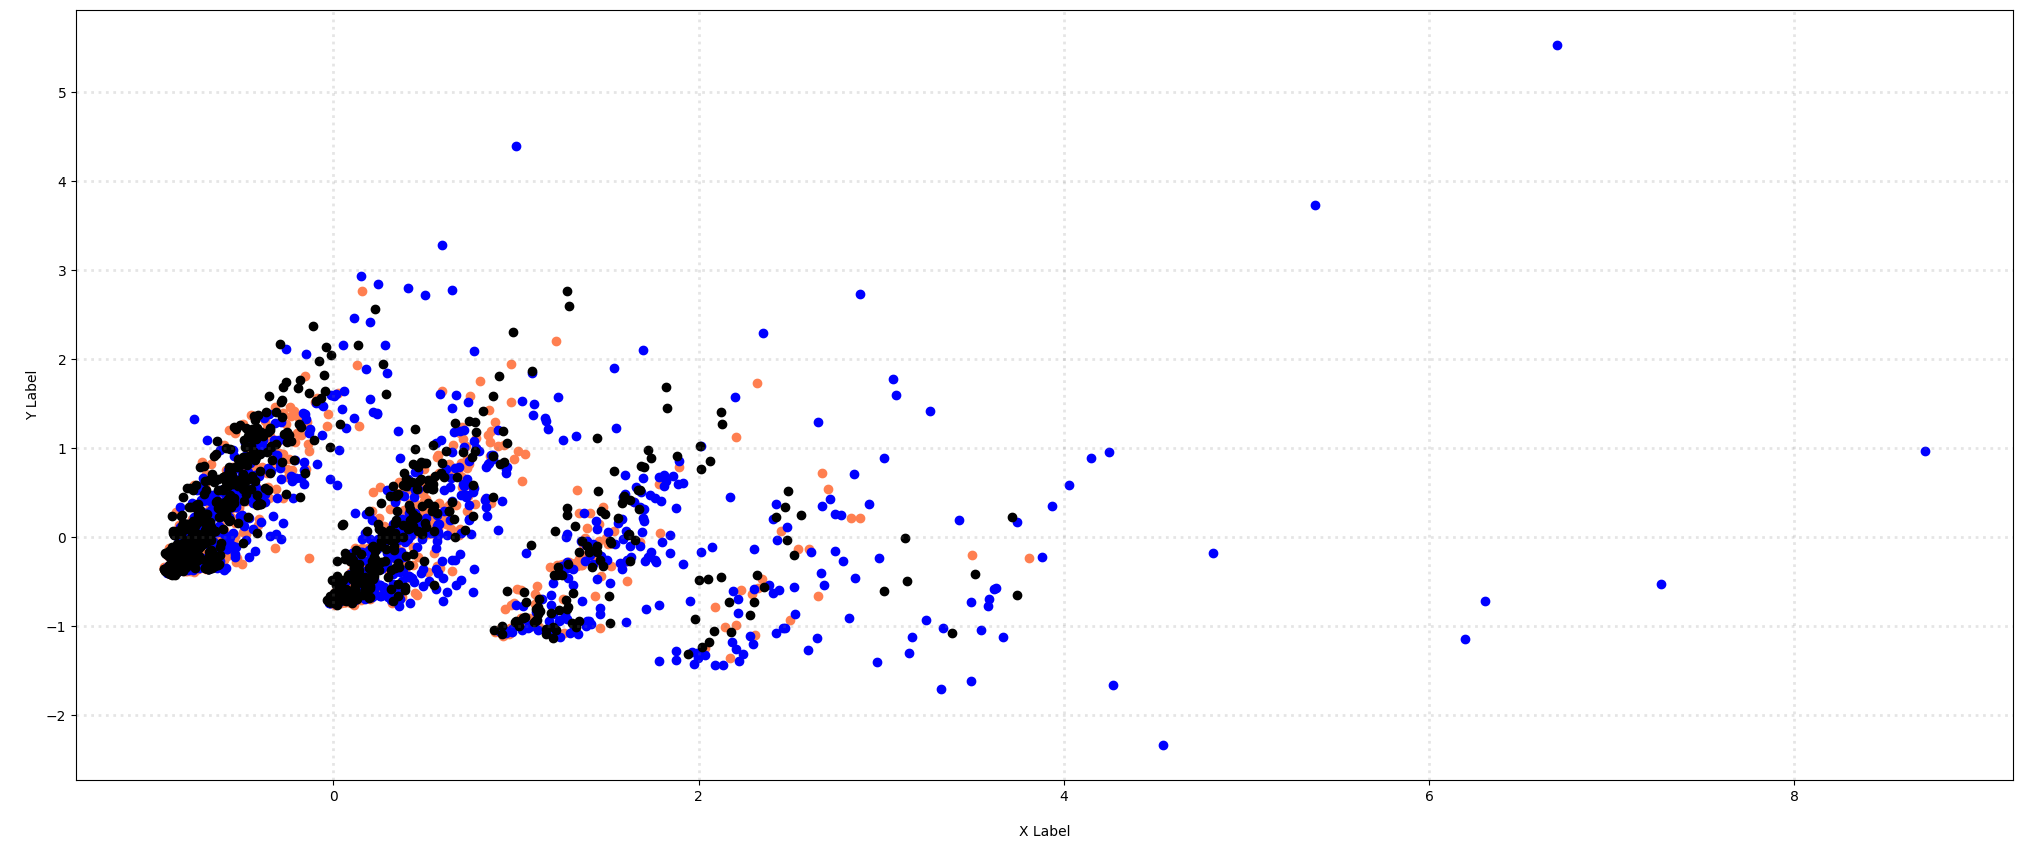

In [28]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

X_reduced.shape

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, dataset.target_names):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

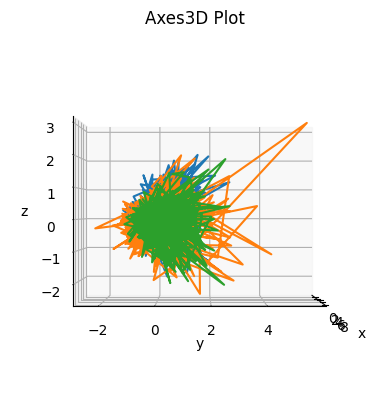

In [29]:
# Answer here

ans = PCA(n_components = 3).fit_transform(X_counts.toarray())

ax_ans = plt.axes(projection='3d')

for c, category in zip(col, dataset.target_names):
    xs = ans[X['category'] == category].T[0]
    ys = ans[X['category'] == category].T[1]
    zs = ans[X['category'] == category].T[2]
    ax_ans.plot(xs, ys, zs)

ax_ans.set_xlabel('x')
ax_ans.set_ylabel('y')
ax_ans.set_zlabel('z')
ax_ans.view_init(elev=0, azim=0)
# ax_ans.view_init(elev=25, azim=0)
# ax_ans.view_init(elev=50, azim=0)
# ax_ans.view_init(elev=10., azim=90)
# ax_ans.view_init(elev=10., azim=180)
# ax_ans.view_init(elev=10., azim=270)
plt.title('Axes3D Plot')
plt.show()

### Attribute Transformation and Aggregation

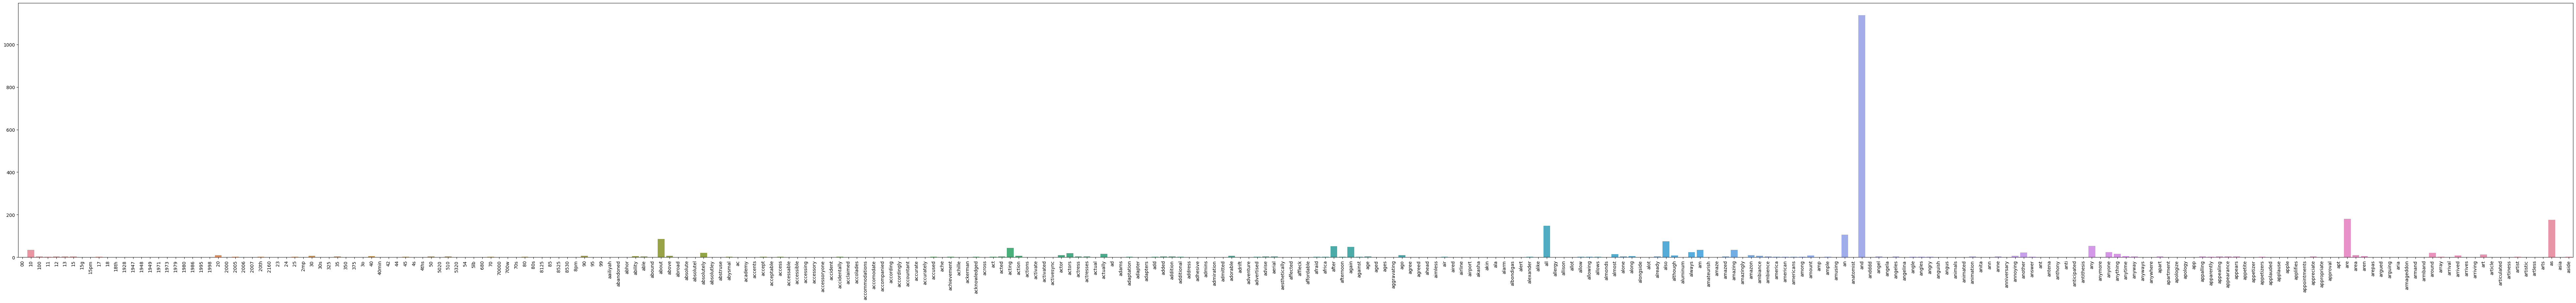

In [107]:
import numpy as np
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Sum of first term
# term_frequencies[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

In [31]:
# Plotly
import plotly.express as px
ans = px.bar(x=count_vect.get_feature_names_out()[:25], y=term_frequencies[:25])
ans.show()

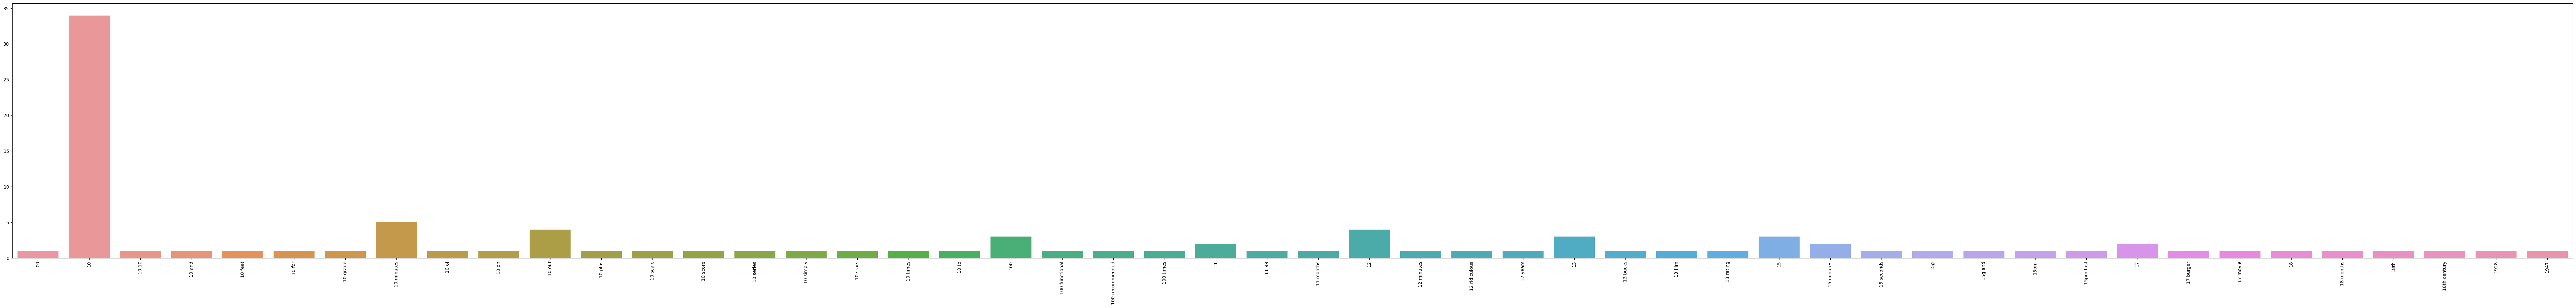

In [32]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names_out()[:50], rotation = 90)
plt.show()

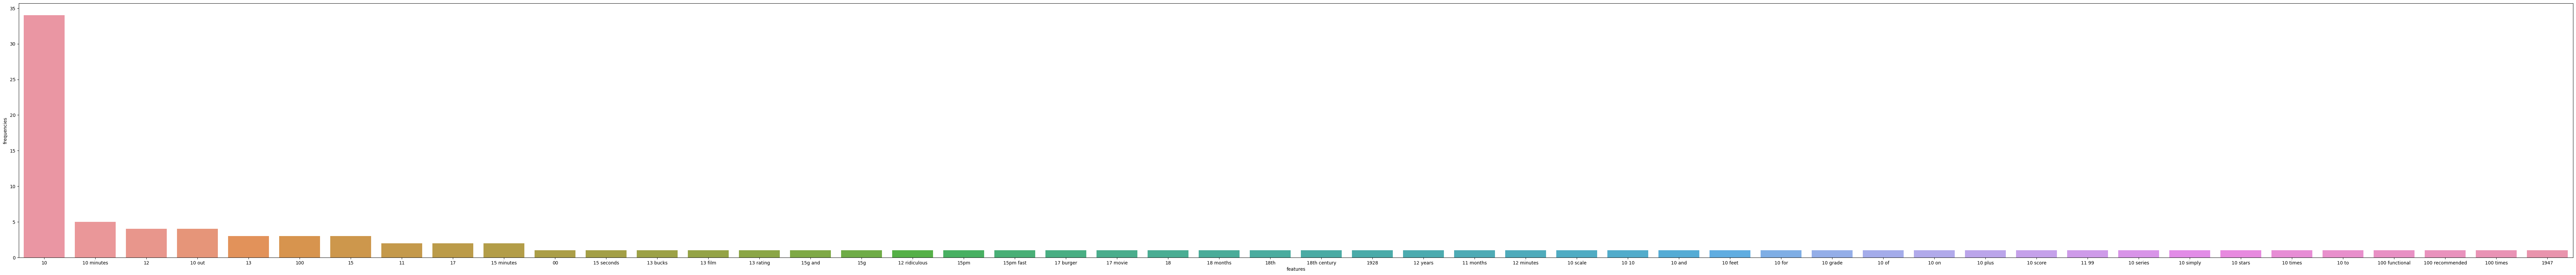

In [33]:
df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:50], "frequencies": term_frequencies[:50]})
plt.subplots(figsize=(100, 10))
g = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

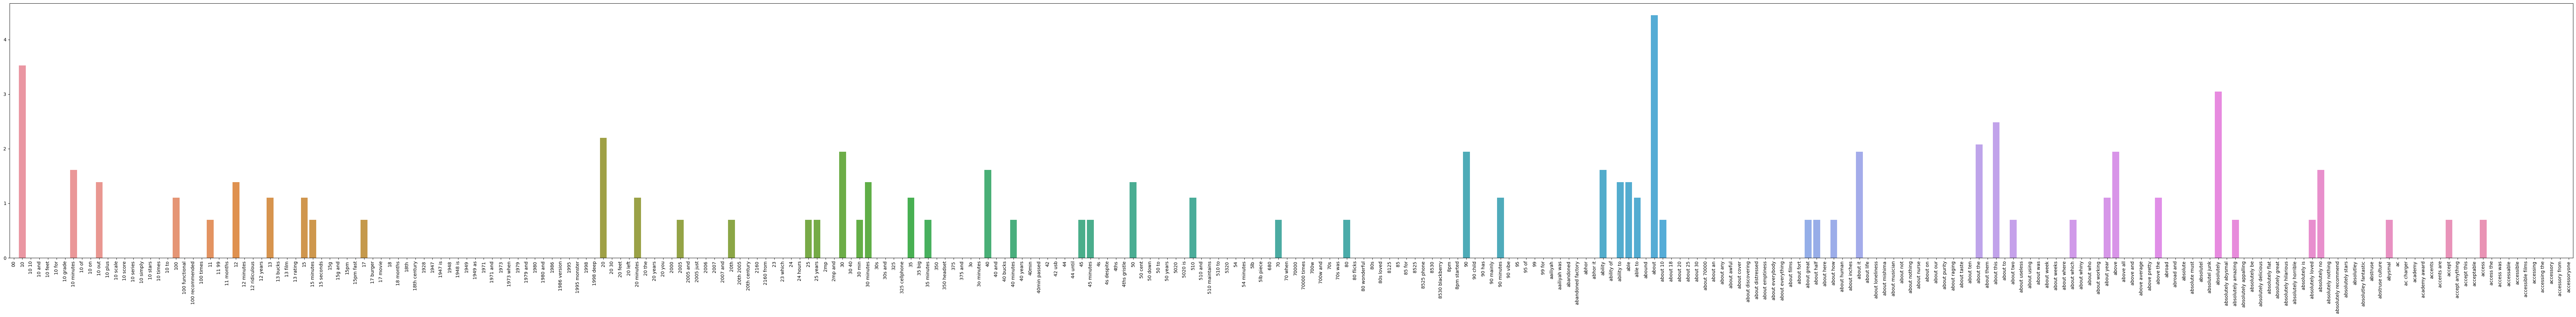

In [34]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

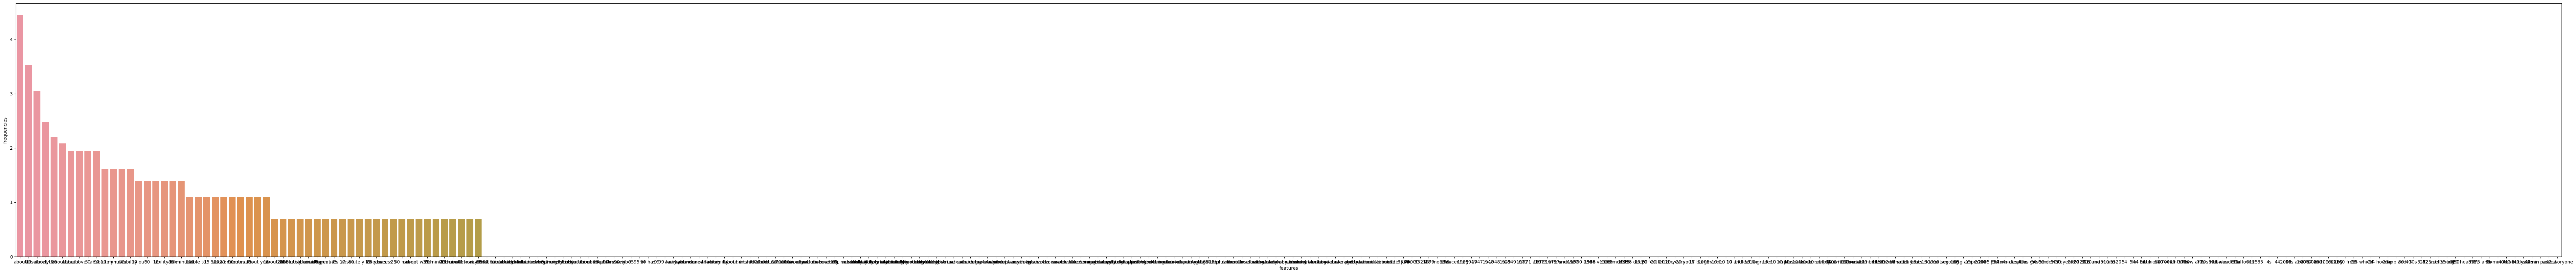

In [35]:
df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:300], "frequencies": term_frequencies_log[:300]})

plt.subplots(figsize=(100, 10))
sorted = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

### Discretization and Binarization

In [36]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category']).tolist()

X[0:9]

,text,sentiment,category,unigrams,bin_category
0,Wow... Loved this place.,1,amazon,"[Wow, ..., Loved, this, place, .]","[1, 0, 0]"
1,Crust is not good.,0,amazon,"[Crust, is, not, good, .]","[1, 0, 0]"
2,Not tasty and the texture was just nasty.,0,amazon,"[Not, tasty, and, the, texture, was, just, nas...","[1, 0, 0]"
3,Stopped by during the late May bank holiday of...,1,amazon,"[Stopped, by, during, the, late, May, bank, ho...","[1, 0, 0]"
4,The selection on the menu was great and so wer...,1,amazon,"[The, selection, on, the, menu, was, great, an...","[1, 0, 0]"
5,Now I am getting angry and I want my damn pho.,0,amazon,"[Now, I, am, getting, angry, and, I, want, my,...","[1, 0, 0]"
6,Honeslty it didn't taste THAT fresh.),0,amazon,"[Honeslty, it, did, n't, taste, THAT, fresh, ....","[1, 0, 0]"
7,The potatoes were like rubber and you could te...,0,amazon,"[The, potatoes, were, like, rubber, and, you, ...","[1, 0, 0]"
8,The fries were great too.,1,amazon,"[The, fries, were, great, too, .]","[1, 0, 0]"


## Data Exploration

In [37]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [38]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.']
['Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!']
['My fiancé and I came in the middle of the day and we were greeted and seated right away.']


In [39]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.168574
Cosine Similarity using count bw 1 and 3: 0.277603
Cosine Similarity using count bw 2 and 3: 0.201945
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third: New Data Visualization, TF-IDF, Naive Bayes Classifier

Difference: The result of TF-IDF and term frequency are almost the same. The only difference between TF-IDF and term frequency is that TF-IDF considers the unimportance of the common word. In the situation that these two scores are almost the same may be the common word in these original dataset is not as common as it goes, so the IDF value affect little on the final result.

## TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_count_vect = TfidfVectorizer()
tfidf_counts = tfidf_count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

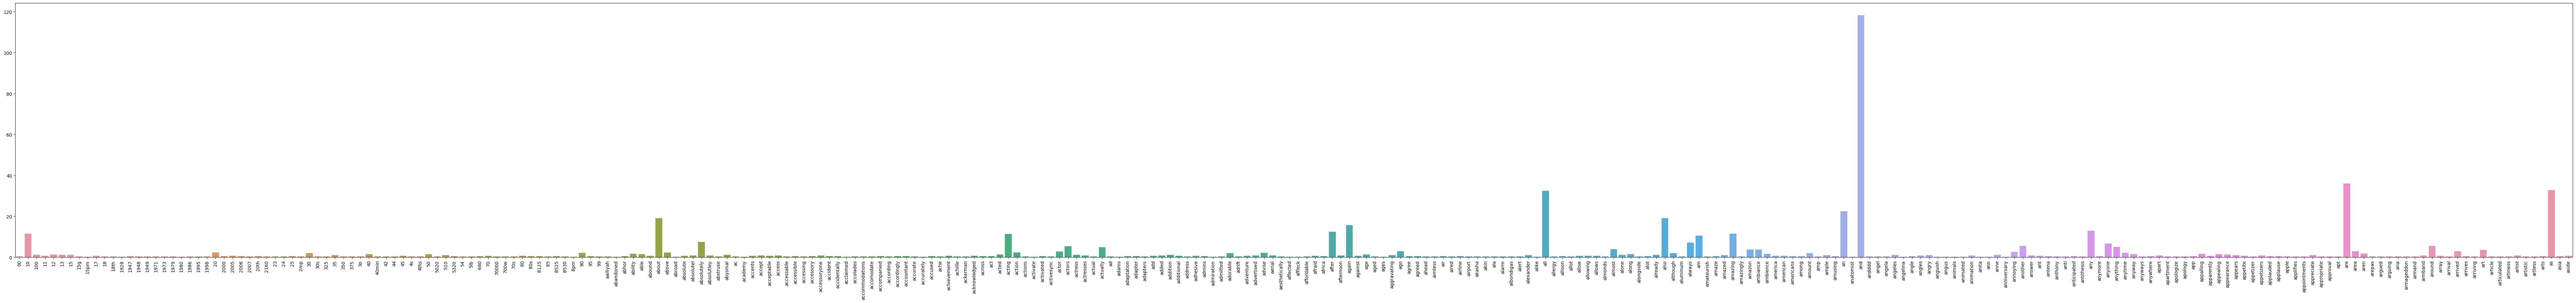

In [70]:
tfidf = []
for j in range(0,tfidf_counts.shape[1]):
    tfidf.append(sum(tfidf_counts[:,j].toarray()))

tfidf = np.asarray(tfidf_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_count_vect.get_feature_names_out()[:300], 
            y=tfidf[:300])
g.set_xticklabels(tfidf_count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

## New Data Visualization

By integrating the score from the tfidf and the term frequency, we can easily identify the difference between each algorithm.

In [112]:
# Answer here
import plotly.express as px

tfidf_df = pd.DataFrame()
tfidf_df['name'] = tfidf_count_vect.get_feature_names_out()
tfidf_df['score'] = tfidf
tfidf_df['category'] = "tfidf"

count_df = pd.DataFrame()
count_df['name'] = count_vect.get_feature_names_out()
count_df['score'] = term_frequencies
count_df['category'] = "count"

total_df = pd.concat([tfidf_df, count_df])
total_df

ans = px.bar(total_df, x="name", y="score", color="category", barmode='group')
ans.show()

## Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_counts, X['sentiment'], test_size=0.25, random_state=1)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8207547169811321

In [49]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_counts, X['sentiment'], test_size=0.25, random_state=1)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8207547169811321

# Fourth: Improvement

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Attribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

## Possible improvement
### Major

1. __Missing Value & Duplicatation__
    -- For the missing value and duplication part, we can directly sum all the result from each column. In this case, we can have a better understanding of the missing part or the duplicated part from certain columns. There is no need to simply call ```.isnull()``` to print out the dataframe and look for the result. We can just use ```X.isnull().apply(lambda x: dmh.check_missing_values(x))``` to check the missing value or the duplication.

2. __CountVector & TF-IDF__
    -- TF-IDF both considers the term frequency and the inverse document frequency, which already covers what "CountVector" does. If we want to do the data processing in our future work, we could probably skip the "CountVector" steps and do the TF-IDF instead. It will have better result and save some time.

3. __Matlibplot & Seaborn & Plotly__
    -- Plotly is more interative and prettier than others. With matlibplot, I have to manually choose different angle for the 3D image. However, with plotly, I can directly drag the image to see from the different angles. I think it's more convenient and time-saving to use plotly.

### Minor

1. __Print the dataframe or messages__ 
    -- This notebook is a data mining tutorial for beginner so some printing operations may be useful for the learner. However, for those who are already familiar with the python may not need lots of printing to understand the current information. Thus, I think too much printing will lower the process and the notebook will be a little bit messy.
    
2. __Processed message for the sake of great visibility__ 
    -- The original notebook analyze the text section and use the following code to process the message for great visibility. However, the final algorithms are term frequency and TF-IDF. They have little to do with the text analysis. Thus, I think this step may cause inefficiency.
 
    ``` "print("\n".join(twenty_train.data[0].split("\n")))"  ```
